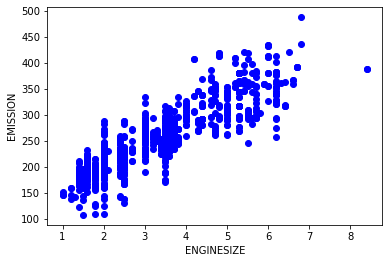

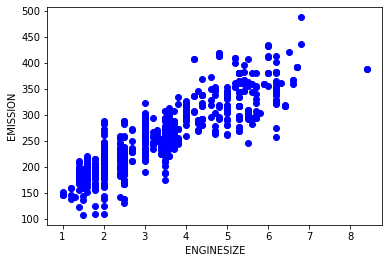

coefficient [[ 9.50118241  7.7103334  10.1481253 ]]
residual sum of square :617.72
variance  :0.84


In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
from sklearn import linear_model


df = pd.read_csv("FuelConsumptionCo2.csv")

df.head()

cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

#plot Emission values with respect to Engine size:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("EMISSION")
pl.show()


#train and test 
t_size = np.random.rand(len(df)) < 0.8
train = cdf[t_size]
test = cdf[~t_size]


#Train data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("ENGINESIZE")
pl.ylabel("EMISSION")
plt.show()


#multiple regression model more than two variables
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)

#the coefficients
print('coefficient', regr.coef_)


#make prediction
y_hat = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print('residual sum of square :%.2f' % np.mean((y_hat - y) **2))

#print variance
print('variance  :%.2f' % regr.score(x,y))

                 
